In [7]:
# Minimal example
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy import stats
import scipy
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

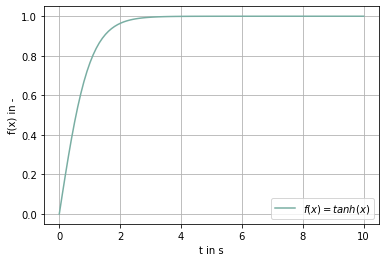

In [5]:
# Data preperation
x = np.linspace(0,10,100)
y = np.tanh(x)

# Plot and configuration
fig = plt.figure()
plt.plot(x, y, c='#79AEA3', label=r'$f(x) = tanh(x) $')
plt.legend()
plt.grid()
plt.xlabel('t in s')
plt.ylabel('f(x) in -')
fig.savefig('tanh.png',bbox_inches='tight', transparent=True)

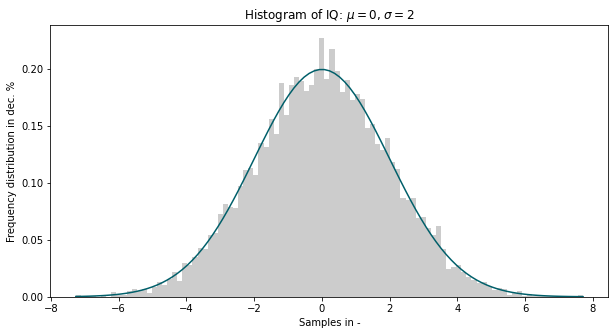

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

#np.random.seed(123456789)
mu = 0  # Mean of distribution
sigma = 2  # Standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 100  # Number of bins

# The histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, color='k', alpha=0.2)

# add a gaussian line
y_gaussian = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y_gaussian, color='#005f6a')
ax.set_xlabel('Samples in -')
ax.set_ylabel('Frequency distribution in dec. %')

ax.set_title(r'Histogram of IQ: $\mu=' + str(mu) + '$, $\sigma=' + str(sigma) + '$')

plt.show()
fig.savefig('hist.png',bbox_inches='tight', transparent=True)

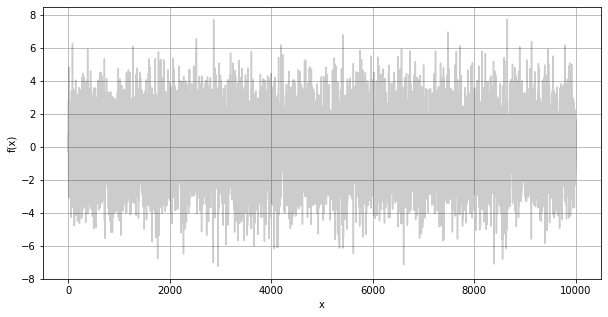

In [16]:
# Plot and configuration
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, color='k', alpha=0.2)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.savefig('hist_time.png',bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Probability Density')

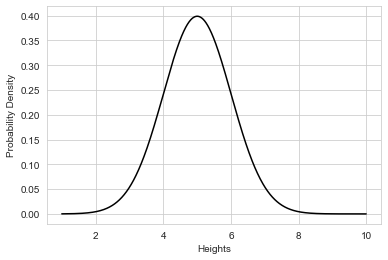

In [10]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data, loc=5, scale=1)
 
#Visualizing the distribution

plt.plot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

<ipython-input-25-1508cca005c5>:44: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


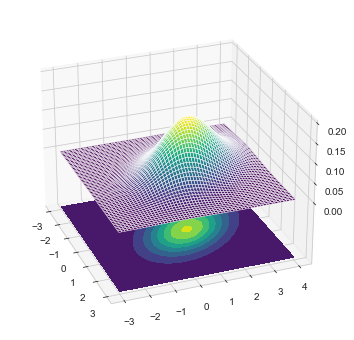

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()
fig.savefig('multivariate_gaussian.png',bbox_inches='tight', transparent=True, dpi=300)

<ipython-input-68-612738bbcf0e>:44: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


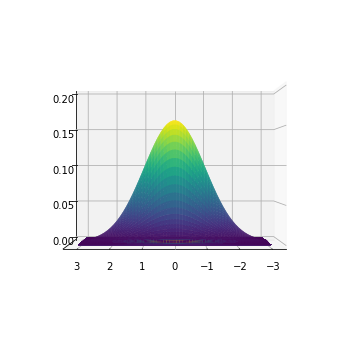

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1 , 0], [0,  1]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.5, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(0,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(azim=90, elev=0)
ax.set_yticks([])

plt.show()
fig.savefig('multivariate_gaussian_1d.png',bbox_inches='tight', transparent=True, dpi=300)

In [5]:
A = np.array([[3,0], [3,1], [3,2]])

In [8]:
np.abs(A)

array([[3, 0],
       [3, 1],
       [3, 2]])

In [13]:
np.add([3,2], np.add([3,0], [3,1]))

array([9, 3])

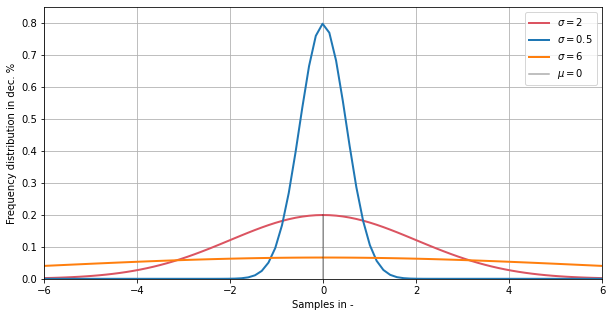

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid()

#np.random.seed(123456789)
mu = 0  # Mean of distribution
sigma = 2  # Standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 100  # Number of bins

# The histogram of the data
#n, bins, patches = ax.hist(x, num_bins, density=True, color='#79AEA3', alpha=0.25)

# add a gaussian line
y_gaussian = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y_gaussian_05 = ((1 / (np.sqrt(2 * np.pi) * 0.5)) * np.exp(-0.5 * (1 / 0.5 * (bins - mu))**2))
y_gaussian_6 = ((1 / (np.sqrt(2 * np.pi) * 6)) * np.exp(-0.5 * (1 / 6 * (bins - mu))**2))

ax.plot(bins, y_gaussian, color='#DB5461', linewidth=2, label=r'$\sigma = 2$') 
ax.plot(bins, y_gaussian_05, linewidth=2, label=r'$\sigma = 0.5$') 
ax.plot(bins, y_gaussian_6, linewidth=2, label=r'$\sigma = 6$') 
ax.plot([0,0],[0,0.199], color='k', alpha=0.33, label=r'$\mu = 0$')

ax.set_xlabel('Samples in -')
ax.set_ylabel('Frequency distribution in dec. %')
plt.xlim([-6, 6])
plt.ylim([0, 0.85])
ax.legend()

plt.show()
fig.savefig('gaussian_1d.png', bbox_inches='tight', transparent=True)

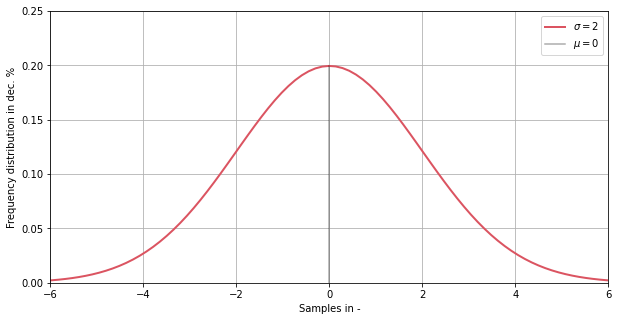

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid()

#np.random.seed(123456789)
mu = 0  # Mean of distribution
sigma = 2  # Standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 100  # Number of bins

# The histogram of the data
#n, bins, patches = ax.hist(x, num_bins, density=True, color='#79AEA3', alpha=0.25)

# add a gaussian line
y_gaussian = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y_gaussian, color='#DB5461', linewidth=2, label=r'$\sigma = 2$') 

ax.plot([0,0],[0,0.199], color='k', alpha=0.33, label=r'$\mu = 0$')

ax.set_xlabel('Samples in -')
ax.set_ylabel('Frequency distribution in dec. %')
plt.xlim([-6, 6])
plt.ylim([0, 0.25])
ax.legend()

plt.show()
fig.savefig('gaussian_1d_.png', bbox_inches='tight', transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid()

#np.random.seed(123456789)
mu = 0  # Mean of distribution
sigma = 2  # Standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 100  # Number of bins

# The histogram of the data
#n, bins, patches = ax.hist(x, num_bins, density=True, color='#79AEA3', alpha=0.25)

# add a gaussian line
y_gaussian = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y_gaussian, color='#DB5461', linewidth=2, label=r'$\sigma = 2$') 

ax.plot([0,0],[0,0.199], color='k', alpha=0.33, label=r'$\mu = 0$')

ax.set_xlabel('Samples in -')
ax.set_ylabel('Frequency distribution in dec. %')
plt.xlim([-6, 6])
plt.ylim([0, 0.25])
ax.legend()

plt.show()
fig.savefig('probability.png', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Probability Density')

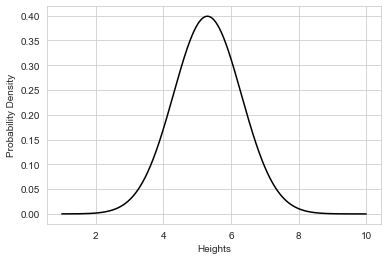

In [2]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

In [3]:
norm(loc = 5.3 , scale = 1).cdf(4.5)

0.21185539858339675

In [4]:
cdf_upper_limit = norm(loc = 5.3 , scale = 1).cdf(6.5)
cdf_lower_limit = norm(loc = 5.3 , scale = 1).cdf(4.5)
 
prob = cdf_upper_limit - cdf_lower_limit

print(prob)

0.673074931194895


In [85]:
from scipy import stats as stats

mu=1.78
std=0.23
x=np.linspace(0, 3, 200)
px = np.linspace(1.82,3,100)

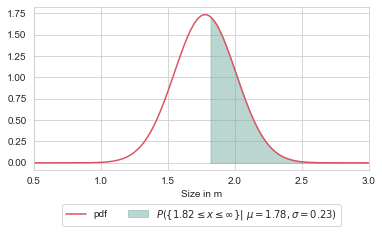

In [89]:
iq= stats.norm(mu, std)
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(x, iq.pdf(x), color='#DB5461', label='pdf')
ax.fill_between(px,iq.pdf(px),color='#79AEA3', alpha=0.5, label=r'$P(\{1.82 \leq x \leq \infty \} \| \ \mu = 1.78, \sigma=0.23)$')
ax.set_xlabel('Size in m')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175), fancybox=True, ncol=5)#
ax.set_xlim([0.5, 3.0])
fig.savefig('probability.png', bbox_inches='tight', transparent=True)

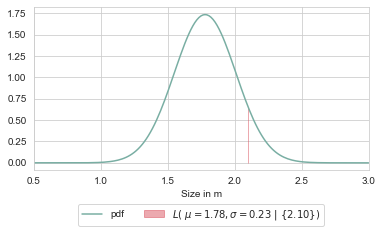

In [82]:
px = np.linspace(2.1, 2.1, 2)
iq= stats.norm(mu, std)
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(x, iq.pdf(x), color='#79AEA3', label='pdf')
ax.fill_between(px,iq.pdf(px),color='#DB5461', alpha=0.5, label=r'$L(\ \mu = 1.78, \sigma=0.23 \ | \ \{2.10\} )$')
ax.set_xlabel('Size in m')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175), fancybox=True, ncol=5)#
ax.set_xlim([0.5, 3.0])
fig.savefig('likelihood.png', bbox_inches='tight', transparent=True)